<a href="https://colab.research.google.com/github/faizdifak/Big-Data/blob/main/Week_13_Matlotlib_dan_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

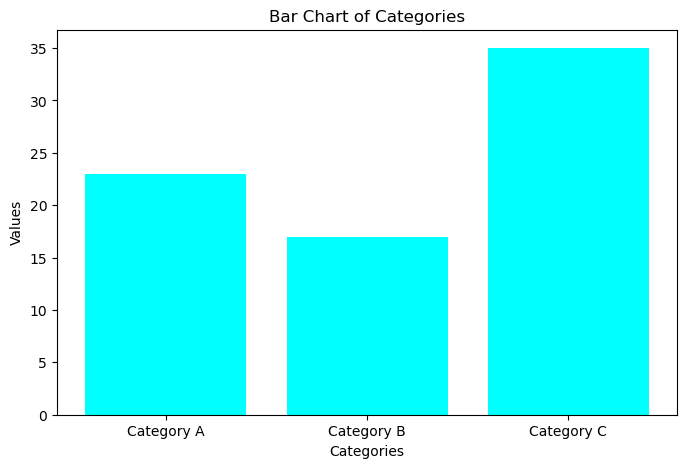

In [ ]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


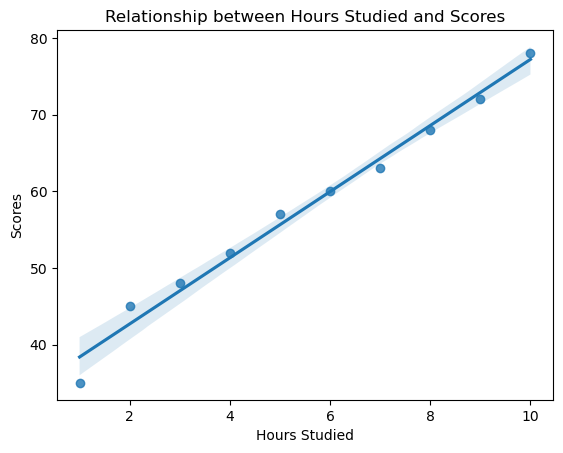

In [ ]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

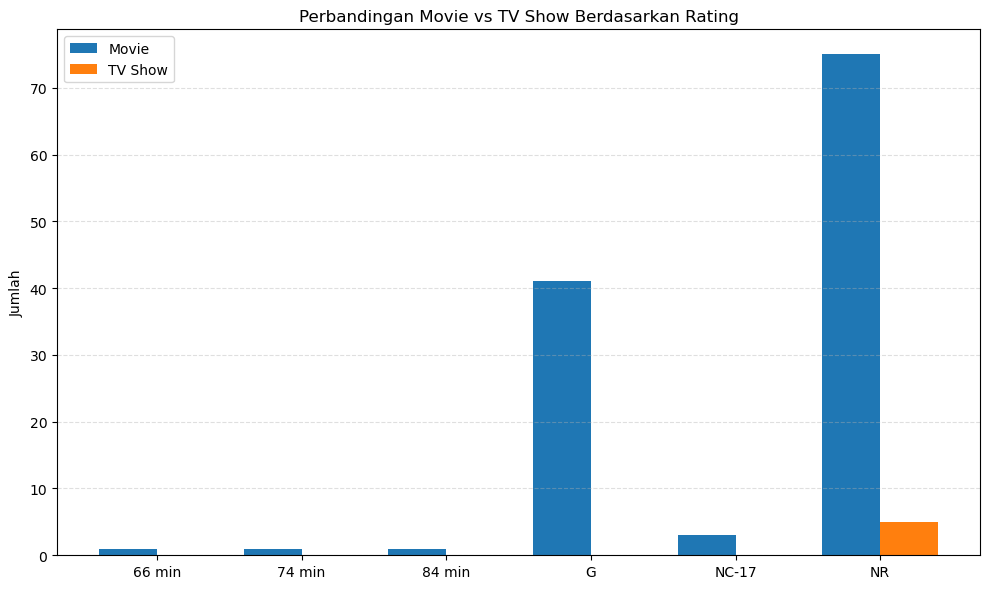

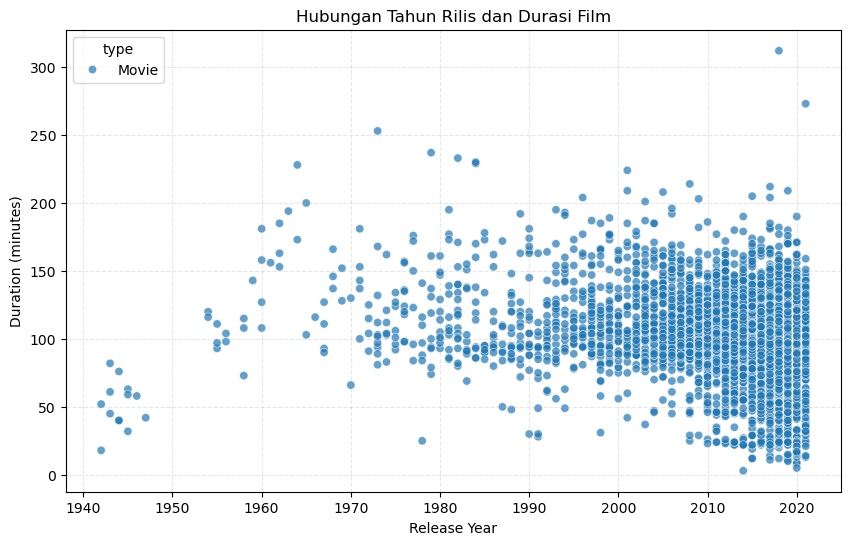

/tmp/ipykernel_2875/2504203231.py:57: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(


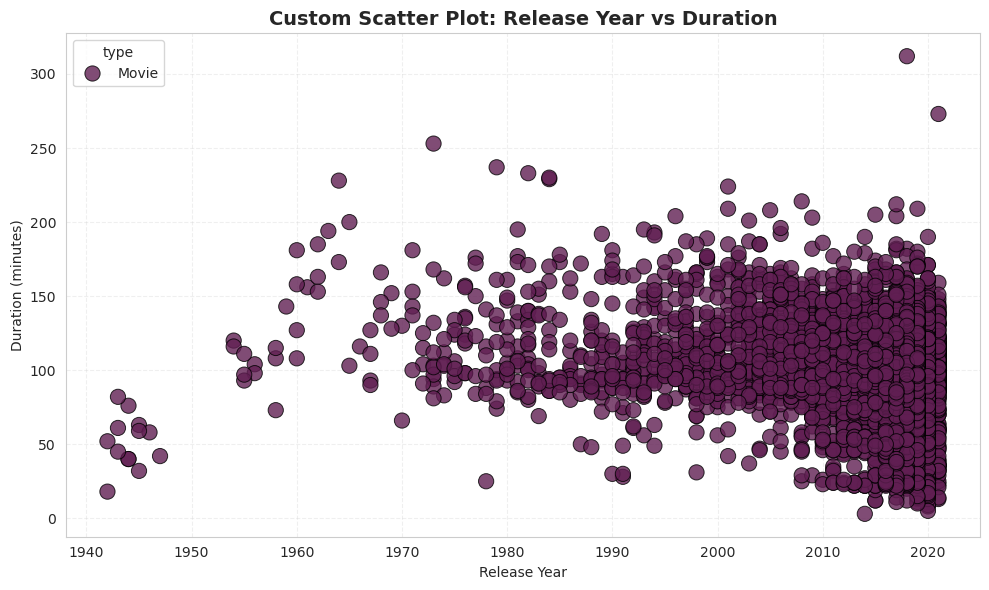

In [ ]:
# Tugas Praktik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/home/fdkbigdata/Downloads/netflix_titles.csv")
# Use Matplotlib to create a multi-bar chart to compare data across groups.
# Ambil jumlah Movie dan TV Show berdasarkan rating
rating_count = df.groupby(["rating", "type"]).size().unstack(fill_value=0)

# Ambil 6 rating yang paling banyak dipakai
rating_count = rating_count.head(6)

plt.figure(figsize=(10, 6))
x = range(len(rating_count))

plt.bar([p - 0.2 for p in x], rating_count["Movie"], width=0.4, label="Movie")
plt.bar([p + 0.2 for p in x], rating_count["TV Show"], width=0.4, label="TV Show")

plt.xticks(x, rating_count.index)
plt.title("Perbandingan Movie vs TV Show Berdasarkan Rating")
plt.ylabel("Jumlah")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
# Untuk scatter plot, kita butuh data numerik
# Kita gunakan: release_year dan durasi (convert menjadi menit)

df_duration = df[df['duration'].str.contains("min", na=False)].copy()
df_duration["duration_minutes"] = df_duration["duration"].str.replace(" min","").astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_duration,
    x="release_year",
    y="duration_minutes",
    hue="type",
    alpha=0.7
)

plt.title("Hubungan Tahun Rilis dan Durasi Film")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Customize plot layouts and color schemes.
sns.set_style("whitegrid")   # Tema latar belakang
palette = sns.color_palette("rocket", 3)  # Custom color scheme

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_duration,
    x="release_year",
    y="duration_minutes",
    hue="type",
    palette=palette,
    s=120,                # ukuran titik diperbesar
    alpha=0.8,            # transparansi
    edgecolor="black",    # outline hitam pada titik
    linewidth=0.7
)

plt.title("Custom Scatter Plot: Release Year vs Duration",
          fontsize=14, fontweight="bold")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2875/3696077310.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values, palette="Set2")


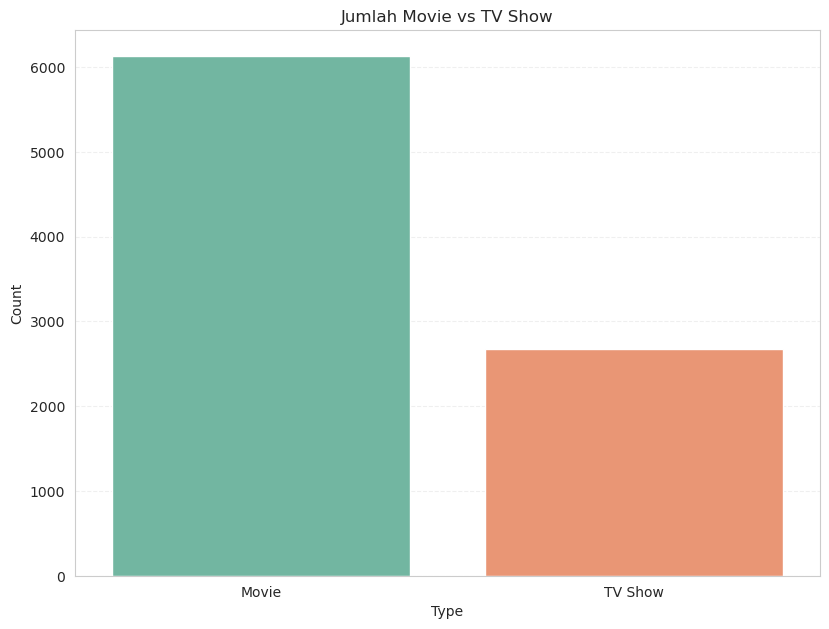

In [ ]:
# Tugas Tambahan
# Create a dashboard with multiple visualizations to summarize a dataset of your choice.
# 1. Bar chart: Movie vs TV Show
type_count = df['type'].value_counts()
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.barplot(x=type_count.index, y=type_count.values, palette="Set2")
plt.title("Jumlah Movie vs TV Show")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

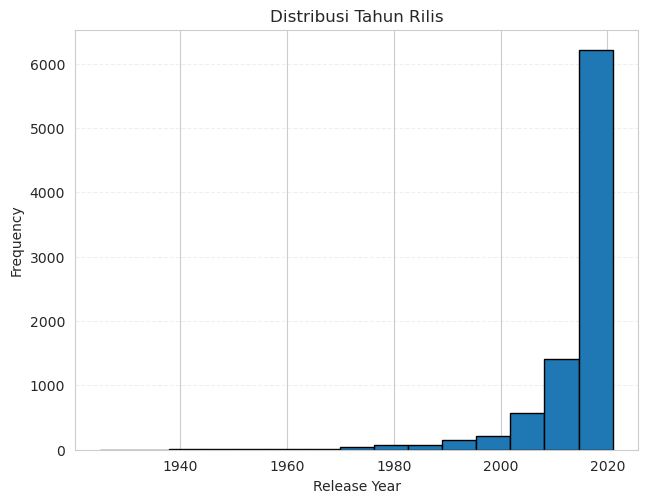

In [ ]:
# 2. Histogram: Distribusi tahun rilis
release_years = df['release_year'].dropna()
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 2)
plt.hist(release_years, bins=15, edgecolor="black")
plt.title("Distribusi Tahun Rilis")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.3)

Text(0.5, 1.0, 'Top 5 Negara dengan Konten Terbanyak')

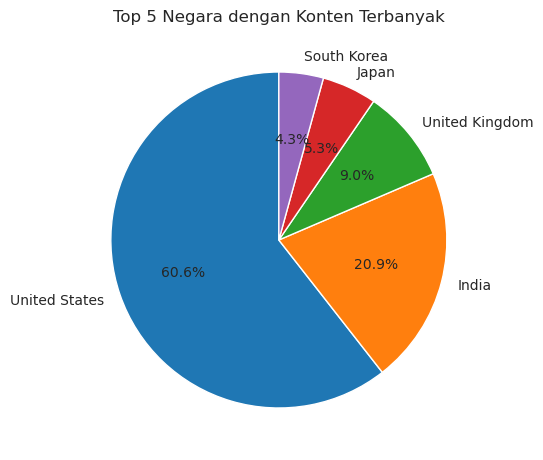

In [ ]:
# 3. Pie chart: Top 5 negara
top_countries = df['country'].value_counts().head(5)
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 3)
plt.pie(top_countries.values, labels=top_countries.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Negara dengan Konten Terbanyak")

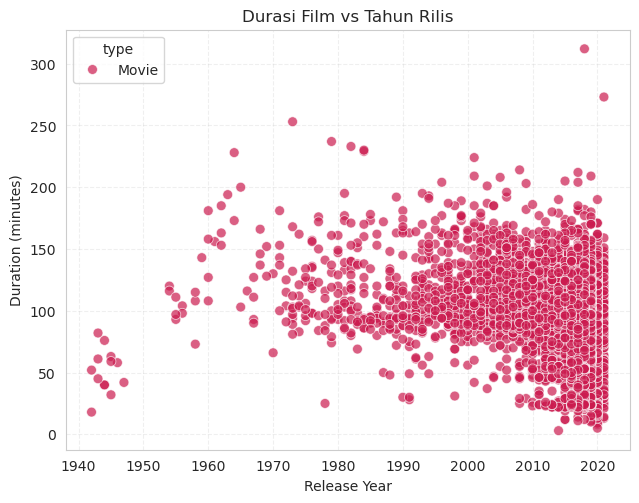

In [ ]:
# 4. Scatter plot: Duration vs Release Year
df_duration = df[df['duration'].str.contains("min", na=False)].copy()
df_duration["duration_minutes"] = df_duration["duration"].str.replace(" min","").astype(int)
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 4)
sns.scatterplot(
    data=df_duration,
    x="release_year",
    y="duration_minutes",
    hue="type",
    palette="rocket",
    alpha=0.7,
    s=50
)
plt.title("Durasi Film vs Tahun Rilis")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.grid(True, linestyle="--", alpha=0.3)